In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. 讀入套件

In [20]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.datasets import imdb

# 2. 讀入數據

In [21]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [22]:
len(x_train)

25000

In [23]:
len(x_test)

25000

In [24]:
len(x_train[0])

218

In [25]:
y_train[0]

1

In [26]:
len(x_train[1])

189

In [27]:
y_train[1]

0

# 3.資料處理

In [28]:
# 把字數限制在200
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

# 4.打造函數學習機

In [29]:
model = Sequential()

In [30]:
# 把10000維變成256
model.add(Embedding(10000, 256))
# 設定drop out避免overfitting
model.add(LSTM(256, recurrent_dropout=0.2))
# 把activation function改成relu
##好處:解決梯度消失問題、稀疏性(解決overfitting)、計算量節省(不用指數運算)
model.add(Dense(1, activation = 'relu'))
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 3,085,569
Trainable params: 3,085,569
Non-trainable params: 0
_________________________________________________________________


# 5. 訓練模型

In [32]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 1549s 62ms/sample - loss: 0.6868 - accuracy: 0.6833 - val_loss: 0.5322 - val_accuracy: 0.7609
Epoch 2/5
25000/25000 [==============================] - 1495s 60ms/sample - loss: 0.6338 - accuracy: 0.7899 - val_loss: 0.5912 - val_accuracy: 0.7390
Epoch 3/5
25000/25000 [==============================] - 1467s 59ms/sample - loss: 1.6083 - accuracy: 0.7332 - val_loss: 0.6334 - val_accuracy: 0.6402
Epoch 4/5
25000/25000 [==============================] - 1478s 59ms/sample - loss: 0.5215 - accuracy: 0.7658 - val_loss: 0.7385 - val_accuracy: 0.7034
Epoch 5/5
25000/25000 [==============================] - 1448s 58ms/sample - loss: 0.4068 - accuracy: 0.8345 - val_loss: 0.6297 - val_accuracy: 0.7762


# 6.訓練結果

In [33]:
result = model.evaluate(x_test, y_test,batch_size=64)
loss, acc = result
print('測試資料的正確率為:', acc)

25000/25000 [==============================] - 241s 10ms/sample - loss: 0.6297 - accuracy: 0.7762
測試資料的正確率為: 0.7762


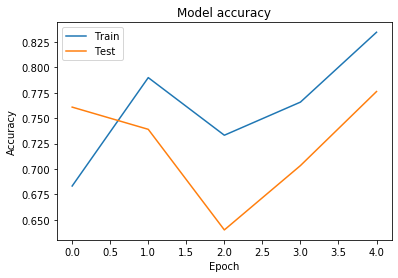

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()